In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### **Cargar los datos**

In [ ]:
import pandas as pd

# Cargar los datos desde Google Drive
file_path = "/content/drive/My Drive/IA/Rest-Mex_2025_train.csv"
df = pd.read_csv(file_path)

# Contar instancias antes del preprocesamiento
print("Instancias antes del preprocesamiento:", len(df))

# Verificar las primeras filas
print(df.head())


Instancias antes del preprocesamiento: 208051
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  


# **Preprocesamiento: Limpiar texto**

**Opcion A:**
Cargaremos los dataset con diferentes codificaciones y verificaremos cual nos bota error.

In [ ]:
# Opción 1: utf-8
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Codificación utf-8 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con utf-8:", e)

# Opción 2: latin1
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("Codificación latin1 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con latin1:", e)

# Opción 3: cp1252 (Windows)
try:
    df = pd.read_csv(file_path, encoding='cp1252')
    print("Codificación cp1252 cargada con éxito")
    print(df.head())
except Exception as e:
    print("Error con cp1252:", e)


Codificación utf-8 cargada con éxito
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  
0      Nayarit  Restaurant  
1  QuintanaRoo  Attractive  
2  QuintanaRoo       Hotel  
3  QuintanaRoo  Attractive  
4    Michoacan       Hotel  
Codificación latin1 cargada con éxito
                             

In [ ]:
import chardet

          # Leer los primeros bytes del archivo
          #with open(file_path, 'rb') as f:
          #   result = chardet.detect(f.read(10000))  # Detecta usando los primeros 10k bytes


# Leer todo el contenido del archivo
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())  # Detecta usando todo el archivo

print("Codificación detectada:", result['encoding'])



Codificación detectada: utf-8


In [ ]:
import re
import pandas as pd

# Función que evalúa la rareza del texto (porcentaje de caracteres "extraños")
def porcentaje_caracteres_no_comunes(texto):
    # Lista de caracteres válidos (puedes ajustarlo si es necesario)
    caracteres_comunes = re.findall(r"[a-zA-ZáéíóúÁÉÍÓÚñÑüÜ .,;:¡!¿?0-9]", texto)

    # Calculamos la "rareza" como la proporción de caracteres no comunes
    return 1 - len(caracteres_comunes) / max(1, len(texto))

# Función para identificar si un texto contiene caracteres sospechosos
def contiene_caracteres_sospechosos(texto):
    return bool(re.search(r'[ÃÂ¢â€œâ€]', texto))  # Puedes agregar más patrones aquí si necesitas

# Leer el dataset
df = pd.read_csv("/content/drive/My Drive/IA/Rest-Mex_2025_train.csv", encoding="utf-8")

# Evaluamos el porcentaje de caracteres raros para cada instancia (fila)
df['error_ratio'] = df['Review'].apply(porcentaje_caracteres_no_comunes)

# Identificamos filas con más del 20% de caracteres raros
filas_con_errores = df[df['error_ratio'] > 0.15]

# Mostrar las filas problemáticas
print("Número de filas con posibles problemas de codificación:", filas_con_errores.shape[0])
print(filas_con_errores[['Title', 'Review', 'error_ratio']])


Número de filas con posibles problemas de codificación: 6
                                      Title  \
41921   Es un restaurant fuera de lo común.   
94937                       variedad-comida   
121944                          Las Tinajas   
127316                            Increíble   
153199                            BUENISIMO   
170002               vista-panorámica-Taxco   

                                                   Review  error_ratio  
41921   Precios muy accesibles. excelente servicio. To...     0.246154  
94937   -recomiendo-bufet-buen-precio&variedad-comida(...     0.160221  
121944  Gran mole___________________________________ d...     0.660377  
127316  En resúmen:\n\nambiente increíble comida\nincr...     0.324786  
153199  Estuve por negocio 10 días y la pasé super bie...     0.167305  
170002  -excelente-vista\n-opciones-menú:\nplato-entra...     0.162963  


In [ ]:
# Eliminar las filas con más del 20% de caracteres raros
df_limpio = df[df['error_ratio'] <= 0.15]

# Verificar el número de filas después de la eliminación
print("Número de filas después de eliminar las filas problemáticas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())


Número de filas después de eliminar las filas problemáticas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en CancÃºn, fuimos al puerto y tomamos...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.026549  


In [ ]:
import re

# Función de limpieza mejorada
def clean_text(text):
    text = text.strip()  # Eliminar espacios extra
    # Solo eliminar caracteres no alfabéticos, pero mantener los acentos y la puntuación
    text = re.sub(r"[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ0-9,.!? ]", "", text)
    return text


# Aplicar la limpieza a las reseñas
df_limpio["Review"] = df_limpio["Review"].apply(clean_text)

# Verificar el número de filas después de la eliminación
print("Número de filas:", df_limpio.shape[0])

# Mostrar las primeras filas del DataFrame limpio
print(df_limpio.head())



Número de filas: 208045
                               Title  \
0              Mi Lugar Favorito!!!!   
1  lugares interesantes para visitar   
2             No es el mismo Dreams    
3  un buen panorama cerca de CancÃºn   
4                           El mejor   

                                              Review  Polarity          Town  \
0  Excelente lugar para comer y pasar una buena n...       5.0      Sayulita   
1  andar mucho, así que un poco difícil para pers...       4.0         Tulum   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0         Tulum   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0  Isla_Mujeres   
4  Es un lugar antiguo y por eso me encanto tiene...       5.0     Patzcuaro   

        Region        Type  error_ratio  
0      Nayarit  Restaurant     0.009615  
1  QuintanaRoo  Attractive     0.000000  
2  QuintanaRoo       Hotel     0.003797  
3  QuintanaRoo  Attractive     0.026549  
4    Michoacan       Hotel     0.000000  


<ipython-input-5-6edf93186282>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Review"] = df_limpio["Review"].apply(clean_text)


In [ ]:
# Eliminar filas con valores faltantes en cualquier columna
df_limpio = df_limpio.dropna()

# Asegurarse de que la columna 'Polarity' sea numérica
df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')

# Eliminar filas donde 'Polarity' es NaN (después de la conversión) y filtrar valores válidos entre 1.0 y 5.0
df_limpio = df_limpio[(df_limpio['Polarity'] >= 1.0) & (df_limpio['Polarity'] <= 5.0)]

# Reiniciar el índice después de eliminar filas
df_limpio = df_limpio.reset_index(drop=True)

# Contar instancias después del preprocesamiento
print("Instancias después del preprocesamiento:", len(df_limpio))

# Mostrar una muestra del DataFrame limpio
print(df_limpio.head(10))



Instancias después del preprocesamiento: 208043
                                               Title  \
0                              Mi Lugar Favorito!!!!   
1                  lugares interesantes para visitar   
2                             No es el mismo Dreams    
3                  un buen panorama cerca de CancÃºn   
4                                           El mejor   
5                                           Preciosa   
6                                 Maravillosa Playa.   
7  Un muy buen lugar para quedarse y comer en Pal...   
8                                  Tiempo para mi...   
9                           Buena Ubicación y limpio   

                                              Review  Polarity  \
0  Excelente lugar para comer y pasar una buena n...       5.0   
1  andar mucho, así que un poco difícil para pers...       4.0   
2  Es nuestra cuarta visita a Dreams Tulum, elegi...       3.0   
3  Estando en Cancn, fuimos al puerto y tomamos u...       4.0   
4  Es

<ipython-input-6-0968a9e0d10f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Polarity'] = pd.to_numeric(df_limpio['Polarity'], errors='coerce')


### **Distribución (frecuencia) de longitud de palabras**

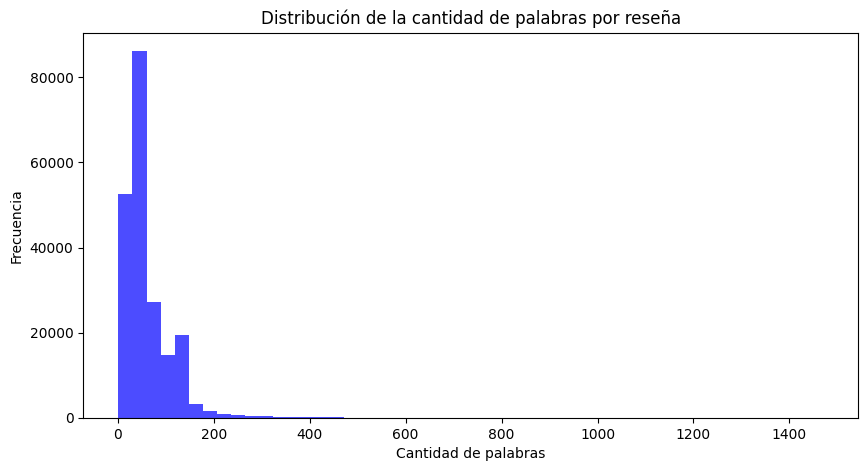

In [ ]:
import matplotlib.pyplot as plt

# Contar palabras por texto en el DataFrame limpio
df_limpio["word_count"] = df_limpio["Review"].apply(lambda x: len(x.split()))

# Graficar distribución de cantidad de palabras
plt.figure(figsize=(10,5))
plt.hist(df_limpio["word_count"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución de la cantidad de palabras por reseña")
plt.show()




Analizando el balanceo de las instancias segun polarity

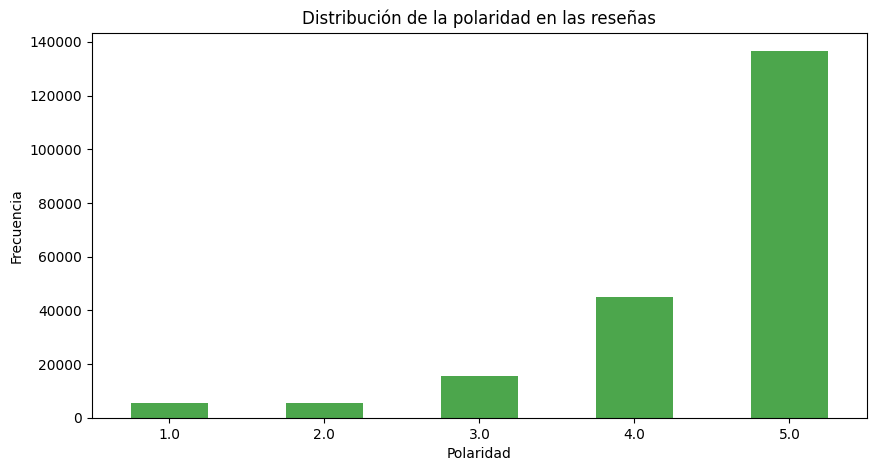

Conteo de instancias por polaridad:
Polarity
1.0      5441
2.0      5496
3.0     15519
4.0     45033
5.0    136554
Name: count, dtype: int64

Porcentaje de instancias por polaridad:
Polarity
1.0     2.615325
2.0     2.641762
3.0     7.459516
4.0    21.646006
5.0    65.637392
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de instancias por cada clase de polaridad
polaridad_counts = df_limpio['Polarity'].value_counts().sort_index()

# Visualizar la distribución de la polaridad
plt.figure(figsize=(10,5))
polaridad_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la polaridad en las reseñas")
plt.xticks(rotation=0)
plt.show()

# Mostrar el conteo de instancias por clase de polaridad
print("Conteo de instancias por polaridad:")
print(polaridad_counts)

# Calcular el porcentaje de cada clase de polaridad
polaridad_percentage = (polaridad_counts / polaridad_counts.sum()) * 100
print("\nPorcentaje de instancias por polaridad:")
print(polaridad_percentage)


## **Submuestreo (undersampling)**
La biblioteca **imbalanced-learn** tiene una implementación sencilla de undersampling llamada **RandomUnderSampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Crear una copia para no tocar df_limpio
df_limpio2 = df_limpio.copy()

# Ver cantidad original por clase
print("Distribución original de Polarity:")
print(df_limpio2['Polarity'].value_counts())

# Variables independientes y dependiente
X = df_limpio2.drop('Polarity', axis=1)
y = df_limpio2['Polarity']


Distribución original de Polarity:
Polarity
5.0    136554
4.0     45033
3.0     15519
2.0      5496
1.0      5441
Name: count, dtype: int64


In [ ]:
# Obtener clases únicas para referencia
clases = y.value_counts().index.tolist()
print("Clases detectadas:", clases)

Clases detectadas: [5.0, 4.0, 3.0, 2.0, 1.0]


In [ ]:
# ------------------------------------------
# 🔧 Configuración manual del undersampling:
# Por ejemplo, supón que estas son tus clases y quieres:
# - Mantener 'A' con 500 instancias
# - 'B' con 500
# - 'C' con 1000
# (ajusta esto con los valores reales que te interesen)
# ------------------------------------------

# Define a cuántas instancias quieres reducir cada clase (ajusta según tu caso)
manual_strategy = {
    5.0: 35000,
    4.0: 35000,
    #'referred to': 2134,
    #'class_3': 1000,
    # Otras clases se pueden omitir si no quieres reducirlas
}

# Aplicar submuestreo con configuración personalizada
undersampler = RandomUnderSampler(sampling_strategy=manual_strategy, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

#================================= CREANDO DF_NEW =================================


# Crear DataFrame balanceado llamado df_new
df_new = pd.DataFrame(X_resampled, columns=X.columns)
df_new['Polarity'] = y_resampled

# Mostrar distribución final
print("\n Distribución después del undersampling personalizado:")
print(df_new['Polarity'].value_counts())

# Tamaño total
print("\nTotal de instancias después del undersampling:", len(df_new))



 Distribución después del undersampling personalizado:
Polarity
5.0    35000
4.0    35000
3.0    15519
2.0     5496
1.0     5441
Name: count, dtype: int64

Total de instancias después del undersampling: 96456


In [ ]:
# Verificar si hay valores nulos en el DataFrame
nulos = df_new.isnull().sum()
# Verificar si hay valores vacíos en el DataFrame
vacios = (df_new == '').sum()

# Mostrar la cantidad de valores nulos y vacíos por columna
print("Valores nulos por columna:")
print(nulos)

print("\nValores vacíos por columna:")
print(vacios)

# Verificar filas con valores nulos o vacíos
filas_con_nulos = df_new[df_new.isnull().any(axis=1)]
filas_con_vacios = df_new[(df_new == '').any(axis=1)]

# Mostrar las filas con valores nulos o vacíos
print("\nFilas con valores nulos:")
print(filas_con_nulos)

print("\nFilas con valores vacíos:")
print(filas_con_vacios)


Valores nulos por columna:
Title          0
Review         0
Town           0
Region         0
Type           0
error_ratio    0
word_count     0
Polarity       0
dtype: int64

Valores vacíos por columna:
Title          0
Review         0
Town           0
Region         0
Type           0
error_ratio    0
word_count     0
Polarity       0
dtype: int64

Filas con valores nulos:
Empty DataFrame
Columns: [Title, Review, Town, Region, Type, error_ratio, word_count, Polarity]
Index: []

Filas con valores vacíos:
Empty DataFrame
Columns: [Title, Review, Town, Region, Type, error_ratio, word_count, Polarity]
Index: []


In [ ]:
# Reiniciar los índices del nuevo DataFrame balanceado
df_new.reset_index(drop=True, inplace=True)

# Ver las primeras filas para comprobar
print("\nPrimeras filas del nuevo dataset balanceado:")
print(df_new.head())

# Guardar una copia del nuevo dataset balanceado (opcional)
df_new.to_csv("/content/df_new.csv", index=False)

# Revisar resumen del DataFrame final
print("\nResumen del DataFrame reensamblado:")
print(df_new.info())




Primeras filas del nuevo dataset balanceado:
                         Title  \
0  Solo les importa el dinero    
1            pésima habitación   
2        La comida es horrible   
3            Ruidoso y molesto   
4                 Mal servicio   

                                              Review        Town  \
0  Hay un solo tipo de clientes para este hotel y...       Tulum   
1  Al leer las críticas por la web me queda claro...  Valladolid   
2  No tienen buen sazón. Los platos están pésimos...      Loreto   
3  No respetan el descanso de los huespedes ni de...       Tulum   
4  Mala atención en recepción y atención telefóni...      Bernal   

               Region        Type  error_ratio  word_count  Polarity  
0         QuintanaRoo       Hotel     0.000000          72       1.0  
1             Yucatan       Hotel     0.000000          78       1.0  
2  Baja_CaliforniaSur  Restaurant     0.000000          22       1.0  
3         QuintanaRoo       Hotel     0.000000          

<ipython-input-14-79e41fbc3487>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Polarity', order=df_new['Polarity'].value_counts().index, palette='magma')


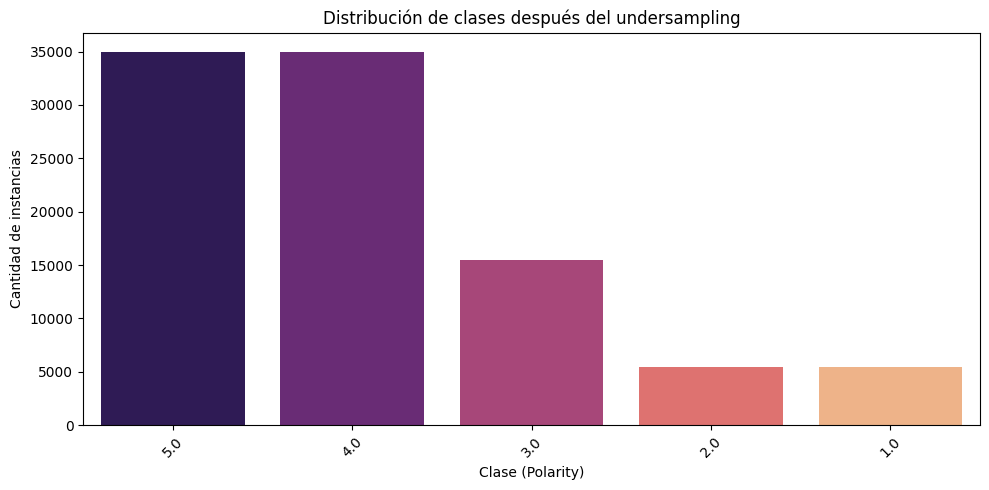

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Conteo después del submuestreo
plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='Polarity', order=df_new['Polarity'].value_counts().index, palette='magma')
plt.title("Distribución de clases después del undersampling")
plt.xlabel("Clase (Polarity)")
plt.ylabel("Cantidad de instancias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Mapeo manual de 'case_outcome' a números
outcome_mapping = {
    5.0 : 4,
    4.0 : 3,
    3.0 : 2,
    2.0 : 1,
    1.0 : 0,
    # Agrega más clases si es necesario
}

# Mapeamos las etiquetas 'case_outcome' a números
df_new['Polarity'] = df_new['Polarity'].map(outcome_mapping)

# Verificación
print(df_new['Polarity'].value_counts())

Polarity
4    35000
3    35000
2    15519
1     5496
0     5441
Name: count, dtype: int64


In [ ]:
print(df_new.iloc[2914:2916])

                                                  Title  \
2914            Una expresión al colonialismo en México   
2915  Horrible . Extremadamente caro para el persona...   

                                                 Review          Town  \
2914  Es muy triste ver este tipo de lugares cuando ...       Xilitla   
2915  Entrada 500 pesos por persona. 300 utilizables...  Isla_Mujeres   

               Region        Type  error_ratio  word_count  Polarity  
2914  San_Luis_Potosi  Attractive     0.000000          92         0  
2915      QuintanaRoo  Attractive     0.004717         115         0  


In [ ]:
from transformers import BertTokenizer

# Cargar el tokenizer de BERT en español
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# Tokenizar las reseñas sin truncation ni padding
token_lengths = [len(tokenizer.encode(text, truncation=False, padding=False)) for text in df_new["Review"]]

# Ver las primeras longitudes de los tokens para ver cómo quedan
print(token_lengths[:10])  # Imprimir las primeras 10 longitudes de tokens


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (876 > 512). Running this sequence through the model will result in indexing errors


[91, 97, 32, 62, 171, 78, 168, 201, 83, 240]


### **Analizar la distribución de tokens**

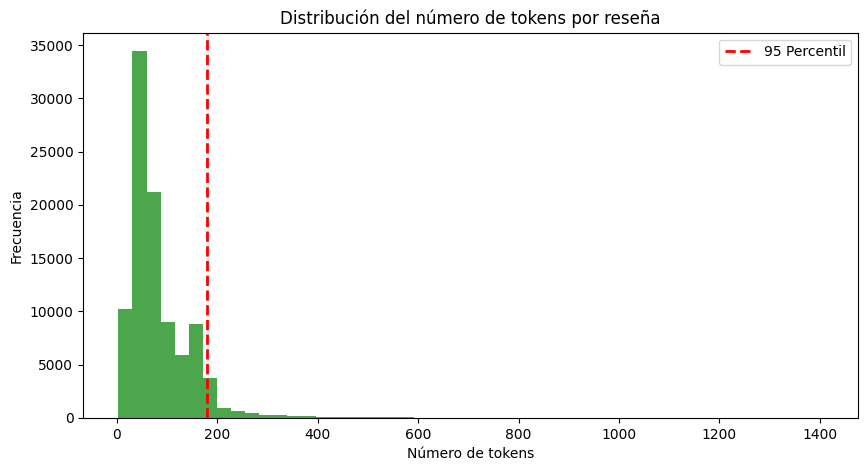

Media de tokens: 83.33
Mediana de tokens: 62.00
90 percentil: 165.00 tokens
95 percentil: 180.00 tokens
99 percentil: 310.45 tokens
Recomendación para max_length en el tokenizer: 180 tokens
Cantidad de reseñas que superan el 95 percentil de tokens: 4705


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizar distribución de tokens
plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50, color='green', alpha=0.7)
plt.xlabel("Número de tokens")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de tokens por reseña")

# Agregar línea para el percentil 95
plt.axvline(np.percentile(token_lengths, 95), color='red', linestyle='dashed', linewidth=2, label='95 Percentil')
plt.legend()

plt.show()

# Obtener estadísticas
mean_tokens = np.mean(token_lengths)
median_tokens = np.median(token_lengths)
percentile_90 = np.percentile(token_lengths, 90)
percentile_95 = np.percentile(token_lengths, 95)
percentile_99 = np.percentile(token_lengths, 99)

# Imprimir estadísticas
print(f"Media de tokens: {mean_tokens:.2f}")
print(f"Mediana de tokens: {median_tokens:.2f}")
print(f"90 percentil: {percentile_90:.2f} tokens")
print(f"95 percentil: {percentile_95:.2f} tokens")
print(f"99 percentil: {percentile_99:.2f} tokens")

# Recomendación para max_length
recommended_max_tokens = int(percentile_95)
print(f"Recomendación para max_length en el tokenizer: {recommended_max_tokens} tokens")

# Opcional: Verificar cuántas reseñas superan el percentil 95
long_reviews = sum([token_length > recommended_max_tokens for token_length in token_lengths])
print(f"Cantidad de reseñas que superan el 95 percentil de tokens: {long_reviews}")


In [ ]:
# Mostrar algunas filas después de la conversión
print("\nPrimeras filas después:")
print(df_new[['Review', 'Polarity']].head())



Primeras filas después:
                                              Review  Polarity
0  Hay un solo tipo de clientes para este hotel y...         0
1  Al leer las críticas por la web me queda claro...         0
2  No tienen buen sazón. Los platos están pésimos...         0
3  No respetan el descanso de los huespedes ni de...         0
4  Mala atención en recepción y atención telefóni...         0


In [ ]:
# Ver valores únicos después
print("Valores únicos después de la actualización:", sorted(df_new['Polarity'].unique()))

Valores únicos después de la actualización: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


los label se han ordenado de manera que primero estan los de etiqueta 0 y al final los de etiqueta 4 (quer eran los 5.0)

In [ ]:
# Ver filas del índice 1 al 10 después de la actualización
print(df_new.iloc[24011:24014])


                                                   Title  \
24011  Un parque regular, vale la pena sólo si tienes...   
24012                                             No así   
24013                                          Un Farito   

                                                  Review  \
24011  Existen lugares en Chiapas que valen más la pe...   
24012  Escuchamos Todas estas estupendas críticas y n...   
24013  Tal como lo citan en el medio de la nada ves u...   

                             Town       Region        Type  error_ratio  \
24011  San_Cristobal_de_las_Casas      Chiapas  Attractive     0.005917   
24012                    Sayulita      Nayarit  Attractive     0.000000   
24013                Isla_Mujeres  QuintanaRoo  Attractive     0.000000   

       word_count  Polarity  
24011          58         2  
24012          27         2  
24013          25         2  


In [ ]:
# Contar las instancias por cada valor de 'Polarity'
polarity_counts = df_new['Polarity'].value_counts().sort_index()

# Imprimir el resumen de las instancias por polaridad
print("Resumen de las instancias por polaridad:")
print(polarity_counts)


Resumen de las instancias por polaridad:
Polarity
0     5441
1     5496
2    15519
3    35000
4    35000
Name: count, dtype: int64


**Fin de paso 2**


### **PASO 3: AHORA SI VAMOS A TOKENIZAR**
DIVIDIENDO Y CONSIDERANDO EL MAXIMO DE TOKENS AL 95%

In [ ]:
# 🔹 Concatenar 'Title' y 'Review' en una sola cadena de texto por fila, llamada nuevamente Review2
df_new['Review2'] = df_new['Title'] + ". " + df_new['Review']

# Ver las primeras filas con el texto concatenado
print(df_new[['Title', 'Review', 'Review2','Polarity']].head())

                         Title  \
0  Solo les importa el dinero    
1            pésima habitación   
2        La comida es horrible   
3            Ruidoso y molesto   
4                 Mal servicio   

                                              Review  \
0  Hay un solo tipo de clientes para este hotel y...   
1  Al leer las críticas por la web me queda claro...   
2  No tienen buen sazón. Los platos están pésimos...   
3  No respetan el descanso de los huespedes ni de...   
4  Mala atención en recepción y atención telefóni...   

                                             Review2  Polarity  
0  Solo les importa el dinero . Hay un solo tipo ...         0  
1  pésima habitación. Al leer las críticas por la...         0  
2  La comida es horrible. No tienen buen sazón. L...         0  
3  Ruidoso y molesto. No respetan el descanso de ...         0  
4  Mal servicio. Mala atención en recepción y ate...         0  


In [ ]:
from sklearn.model_selection import train_test_split
import torch

# Usar el percentil 95 como max_length (has decidido basarte en esto)
#recommended_max_tokens = int(percentile_95)
recommended_max_tokens = 220


# 🔹 Dividir los datos balanceados (df_new) en entrenamiento (75%) y prueba (25%)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_new["Review2"].tolist(),         # Lista de reseñas
    df_new["Polarity"].tolist(),      # Lista de etiquetas
    test_size=0.25,                   # 25% para test
    random_state=42                   # Para reproducibilidad
)

# 🔹 Ahora dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels,
    test_size=0.20,                   # 20% de los datos de entrenamiento va a validación
    random_state=42
)




In [ ]:
# Verificar la cantidad de instancias en cada conjunto
print(f"Cantidad de textos de entrenamiento: {len(train_texts)}")
print(f"Cantidad de textos de validación: {len(val_texts)}")
print(f"Cantidad de textos de prueba: {len(test_texts)}")


Cantidad de textos de entrenamiento: 57873
Cantidad de textos de validación: 14469
Cantidad de textos de prueba: 24114


## **Data augmentation solo sobre train**

In [ ]:
# Descargar EDA desde GitHub y guardar en un archivo local
!wget https://raw.githubusercontent.com/jasonwei20/eda_nlp/master/code/eda.py

# Ahora sí podemos importarlo
from eda import eda


--2025-05-02 12:51:34--  https://raw.githubusercontent.com/jasonwei20/eda_nlp/master/code/eda.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7047 (6.9K) [text/plain]
Saving to: ‘eda.py’

eda.py              100%[===================>]   6.88K  --.-KB/s    in 0s      

2025-05-02 12:51:34 (89.8 MB/s) - ‘eda.py’ saved [7047/7047]



/content/eda.py:177: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']


In [ ]:
def augment_class(texts, labels, target_label, num_augments_per_sample=1):
    new_texts = []
    new_labels = []
    for text, label in zip(texts, labels):
        if label == target_label:
            augmented = eda(text, num_aug=num_augments_per_sample)
            new_texts.extend(augmented)
            new_labels.extend([label]*len(augmented))
    return new_texts, new_labels


In [ ]:
import pandas as pd

# Crear un DataFrame con los textos y las etiquetas
train_df = pd.DataFrame({
    'Texto': train_texts,
    'Etiqueta': train_labels
})
# Verificación
print(train_df['Etiqueta'].value_counts())
# Ver cuántas instancias (filas) tiene el DataFrame
num_instancias = train_df.shape[0]
print(f"El DataFrame tiene {num_instancias} instancias.")


Etiqueta
4    21032
3    20898
2     9330
1     3331
0     3282
Name: count, dtype: int64
El DataFrame tiene 57873 instancias.


In [ ]:
import nltk
nltk.download('wordnet')

# Primero pasamos todo a listas por si aún están en otro formato
train_texts = list(train_texts)
train_labels = list(train_labels)

# Augmenta clases 0 y 1
aug_texts_1, aug_labels_1 = augment_class(train_texts, train_labels, 0, num_augments_per_sample=1)
aug_texts_2, aug_labels_2 = augment_class(train_texts, train_labels, 1, num_augments_per_sample=1)

# Combinar todo
train_texts = train_texts + aug_texts_1 + aug_texts_2
train_labels = train_labels + aug_labels_1 + aug_labels_2


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Verificar la cantidad de instancias en cada conjunto
print(f"Cantidad de textos de entrenamiento: {len(train_texts)}")
print(f"Cantidad de textos de validación: {len(val_texts)}")
print(f"Cantidad de textos de prueba: {len(test_texts)}")

Cantidad de textos de entrenamiento: 71099
Cantidad de textos de validación: 14469
Cantidad de textos de prueba: 24114


In [ ]:
import pandas as pd

# Crear un DataFrame con los textos y las etiquetas
train_df = pd.DataFrame({
    'Texto': train_texts,
    'Etiqueta': train_labels
})
# Verificación
print(train_df['Etiqueta'].value_counts())
# Ver cuántas instancias (filas) tiene el DataFrame
num_instancias = train_df.shape[0]
print(f"El DataFrame tiene {num_instancias} instancias.")


Etiqueta
4    21032
3    20898
1     9993
0     9846
2     9330
Name: count, dtype: int64
El DataFrame tiene 71099 instancias.


In [ ]:
import pandas as pd

# Crear un DataFrame con los textos y las etiquetas
train_df = pd.DataFrame({
    'Texto': train_texts,
    'Etiqueta': train_labels
})

# Ver cuántas instancias (filas) tiene el DataFrame
num_instancias = train_df.shape[0]
print(f"El DataFrame tiene {num_instancias} instancias.")

# Ver las primeras filas
print(train_df.iloc[5440:5451])
# Guardar train_df como un archivo CSV
train_df.to_csv('train_data.csv', index=False)


El DataFrame tiene 71099 instancias.
                                                  Texto  Etiqueta
5440  "Bellísima restauración se le realizó a ésta h...         4
5441  Linda vista. Ideal para caminar ó sentarse y c...         3
5442  Un lugar mágico!. Un templo hermoso por fuera ...         4
5443  Vivimos aquí, así que nuestra experiencia abar...         3
5444  Para visitar. Un poco de historia siempre cae ...         4
5445  increíble comida, bebidas y playa. Playa Paraí...         4
5446  De lo mejor. Impresionante cenote, el agua dem...         4
5447  NO DUDES, ESTA ES LA OPCION. Ubicación excelen...         3
5448  Un museo restaurant. Frente a la iglesia este ...         3
5449  solo abren para visitarlo cuando hay excursion...         1
5450  Her-mo-sa!! . No hay palabras!! Esta bellísima...         4


In [ ]:
print(df_new[['Title', 'Review', 'Review2','Polarity']].iloc[5441])

Title                                   Deja mucho que desear
Review      Tal vez es de lo más acogedor y vistoso que ha...
Review2     Deja mucho que desear. Tal vez es de lo más ac...
Polarity                                                    1
Name: 5441, dtype: object


### **TOKENIZACION**

In [ ]:
from transformers import BertTokenizer

# Cargar el tokenizer de BERT en español
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 🔹 Tokenizar las reseñas con truncamiento y padding
# return_tensors="pt" devuelve tensores de PyTorch
train_encodings = tokenizer(train_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=recommended_max_tokens, return_tensors="pt")


# Ver las primeras filas con el texto concatenado (linea que no correspode aqui)
print(df_new[['Title', 'Review', 'Review2','Polarity']].head())



                         Title  \
0  Solo les importa el dinero    
1            pésima habitación   
2        La comida es horrible   
3            Ruidoso y molesto   
4                 Mal servicio   

                                              Review  \
0  Hay un solo tipo de clientes para este hotel y...   
1  Al leer las críticas por la web me queda claro...   
2  No tienen buen sazón. Los platos están pésimos...   
3  No respetan el descanso de los huespedes ni de...   
4  Mala atención en recepción y atención telefóni...   

                                             Review2  Polarity  
0  Solo les importa el dinero . Hay un solo tipo ...         0  
1  pésima habitación. Al leer las críticas por la...         0  
2  La comida es horrible. No tienen buen sazón. L...         0  
3  Ruidoso y molesto. No respetan el descanso de ...         0  
4  Mal servicio. Mala atención en recepción y ate...         0  


In [ ]:
import torch

# Verificar tamaños
print(f"Cantidad de textos de entrenamiento: {len(train_texts)}")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}")
print(f"Cantidad de textos de validación: {len(val_texts)}")
print(f"Cantidad de etiquetas de validación: {len(val_labels)}")
print(f"Cantidad de textos de prueba: {len(test_texts)}")
print(f"Cantidad de etiquetas de prueba: {len(test_labels)}")

# Verificar si las etiquetas y textos están correctamente alineados (es decir, el número de etiquetas coincide con el número de textos)
assert len(train_texts) == len(train_labels), "El número de textos de entrenamiento no coincide con el número de etiquetas"
assert len(val_texts) == len(val_labels), "El número de textos de validación no coincide con el número de etiquetas"
assert len(test_texts) == len(test_labels), "El número de textos de prueba no coincide con el número de etiquetas"

# Verificar una muestra de las primeras 3 entradas
print(f"Primeras 3 reseñas de entrenamiento: {train_texts[:3]}")
print(f"Primeras 3 etiquetas de entrenamiento: {train_labels[:3]}")


Cantidad de textos de entrenamiento: 71099
Cantidad de etiquetas de entrenamiento: 71099
Cantidad de textos de validación: 14469
Cantidad de etiquetas de validación: 14469
Cantidad de textos de prueba: 24114
Cantidad de etiquetas de prueba: 24114
Primeras 3 reseñas de entrenamiento: ['Pésima Atención. Si bien no llegamos con reservación, al llegar a preguntar si tenían habitaciones libres nos trataron muy despectivamente y groseramente. Era nuestra primera opción para alojarnos y la verdad no me quedaron granas de regresar.', '=). Todo excelente! Desde la llega hasta la salida. Lo único malo fue que la regadera no se puede regular en una temperatura normal. Sale o muy fría o muy caliente. De ahí en fuera todo muy bien. El personal muy atento, la comida perfecta. Nos ayudaron a guardar nuestras cosas.', 'sorprendente propiedad en una ubicación de primera. El hotel está ubicado en la plaza central de la ciudad y ofrece un idílico ambiente español. Las habitaciones estaban limpias, pequeñ

In [ ]:
# Verificar el tipo y tamaño de los tensores después de la tokenización
print(f"Tamaño de los tensores de entrenamiento: {train_encodings['input_ids'].shape}")
print(f"Tamaño de los tensores de validación: {val_encodings['input_ids'].shape}")
print(f"Tamaño de los tensores de prueba: {test_encodings['input_ids'].shape}")

# Verificar que las etiquetas sean tensores y tengan la misma longitud que los tensores de entrada
train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)
test_labels_tensor = torch.tensor(test_labels)

print(f"Tamaño de las etiquetas de entrenamiento: {train_labels_tensor.shape}")
print(f"Tamaño de las etiquetas de validación: {val_labels_tensor.shape}")
print(f"Tamaño de las etiquetas de prueba: {test_labels_tensor.shape}")


Tamaño de los tensores de entrenamiento: torch.Size([71099, 220])
Tamaño de los tensores de validación: torch.Size([14469, 220])
Tamaño de los tensores de prueba: torch.Size([24114, 220])
Tamaño de las etiquetas de entrenamiento: torch.Size([71099])
Tamaño de las etiquetas de validación: torch.Size([14469])
Tamaño de las etiquetas de prueba: torch.Size([24114])


Parece que está esta repitiendo lo de arriba

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Convertir etiquetas a tensores
train_labels_tensor = torch.tensor(train_labels).clone().detach()  # Convertir a tensor y evitar gradientes
val_labels_tensor = torch.tensor(val_labels).clone().detach()  # Convertir a tensor y evitar gradientes
test_labels_tensor = torch.tensor(test_labels).clone().detach()  # Convertir a tensor y evitar gradientes

# Crear datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'].clone().detach(),  # Usamos clone().detach() en lugar de torch.tensor()
    train_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    train_labels_tensor
)

val_dataset = TensorDataset(
    val_encodings['input_ids'].clone().detach(),  # Lo mismo aquí
    val_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    val_labels_tensor
)

test_dataset = TensorDataset(
    test_encodings['input_ids'].clone().detach(),  # Lo mismo aquí
    test_encodings['attention_mask'].clone().detach(),  # Lo mismo aquí
    test_labels_tensor
)

# Crear DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# 🔹 Verificar la primera entrada de un batch para asegurar que todo esté bien
print("Ejemplo de batch del DataLoader de entrenamiento:")
for batch in train_dataloader:
    input_ids_batch, attention_mask_batch, labels_batch = batch
    print(f"Input IDs shape: {input_ids_batch.shape}")
    print(f"Attention Mask shape: {attention_mask_batch.shape}")
    print(f"Labels shape: {labels_batch.shape}")
    break  # Solo imprimimos el primer batch

# 🔹 Verificar que las longitudes de las listas de datos y etiquetas coincidan
print(f"Cantidad de textos de entrenamiento: {len(train_labels_tensor)}")
print(f"Cantidad de textos de validación: {len(val_labels_tensor)}")
print(f"Cantidad de textos de prueba: {len(test_labels_tensor)}")


Ejemplo de batch del DataLoader de entrenamiento:
Input IDs shape: torch.Size([16, 220])
Attention Mask shape: torch.Size([16, 220])
Labels shape: torch.Size([16])
Cantidad de textos de entrenamiento: 71099
Cantidad de textos de validación: 14469
Cantidad de textos de prueba: 24114


In [ ]:
num_labels = len(set(train_labels))
print(f"El número de etiquetas únicas en el conjunto de entrenamiento es: {num_labels}")

El número de etiquetas únicas en el conjunto de entrenamiento es: 5


In [ ]:
import torch
from torch.optim import AdamW  # Cambio en la importación de AdamW
import torch.nn as nn
from transformers import BertForSequenceClassification

# Paso 1: Seleccionar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Usando el dispositivo: {device}")

# Paso 2: Cargar modelo BERT preentrenado en inglés para clasificación con 5 clases ---------------------
model = BertForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=5)

# Paso 3: Congelar capas de BERT (por ejemplo, las primeras 6 de 12)
for name, param in model.bert.encoder.layer[:6].named_parameters():
    param.requires_grad = False
print("🔒 Capas congeladas: 0 a 5")

# Paso 4: Mover modelo al dispositivo (GPU o CPU)
model.to(device)

# Paso 5: Optimización y función de pérdida
optimizer = AdamW(model.parameters(), lr=1e-5) # Ajustar la tasa de aprendizaje si es necesario

# Definir la función de pérdida (Cross Entropy Loss)
criterion = nn.CrossEntropyLoss()



✅ Usando el dispositivo: cuda


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔒 Capas congeladas: 0 a 5


In [ ]:
import numpy as np

# Verificar las primeras 5 etiquetas
print("Primeras 5 etiquetas:", train_labels[:5])

# Comprobar si alguna etiqueta es un vector one-hot
for i, label in enumerate(train_labels[:10]):  # Verifica las primeras 10 etiquetas
    if isinstance(label, list) or isinstance(label, np.ndarray):
        if sum(label) != 1:
            print(f"Etiqueta en formato one-hot en el índice {i}: {label}")
        else:
            print(f"Etiqueta en formato one-hot válida en el índice {i}: {label}")
    else:
        print(f"Etiqueta en formato índice de clase en el índice {i}: {label}")

Primeras 5 etiquetas: [0, 3, 3, 4, 1]
Etiqueta en formato índice de clase en el índice 0: 0
Etiqueta en formato índice de clase en el índice 1: 3
Etiqueta en formato índice de clase en el índice 2: 3
Etiqueta en formato índice de clase en el índice 3: 4
Etiqueta en formato índice de clase en el índice 4: 1
Etiqueta en formato índice de clase en el índice 5: 3
Etiqueta en formato índice de clase en el índice 6: 3
Etiqueta en formato índice de clase en el índice 7: 4
Etiqueta en formato índice de clase en el índice 8: 2
Etiqueta en formato índice de clase en el índice 9: 3


### **Parte 5: Entrenamiento (model.train())**
Aquí es donde ocurre el fine-tuning real, es decir, se ajustan los pesos del modelo con tus propios datos.

Lo que sucede:
* Se activa el modo entrenamiento (model.train()).
* Se pasan los datos por el modelo (outputs = model(...)).
* Se calcula la pérdida (loss = outputs.loss).
* Se hace backpropagation (loss.backward()).
* Se actualizan los pesos con el optimizador (optimizer.step()).

**nuevo 2 de Mayo**

Epoch 1/10
  🔹 Train loss: 0.7730
  🔹 Validation loss: 0.7584
  ✅ Validation accuracy: 66.39%
💾 Mejor modelo guardado en /content/drive/MyDrive/IA/best_model_restMex2204A2
Epoch 2/10
  🔹 Train loss: 0.6717
  🔹 Validation loss: 0.7515
  ✅ Validation accuracy: 66.91%
💾 Mejor modelo guardado en /content/drive/MyDrive/IA/best_model_restMex2204A2
Epoch 3/10
  🔹 Train loss: 0.5902
  🔹 Validation loss: 0.7750
  ✅ Validation accuracy: 67.15%
Epoch 4/10
  🔹 Train loss: 0.4973
  🔹 Validation loss: 0.8066
  ✅ Validation accuracy: 66.69%
🛑 Early stopping activado.


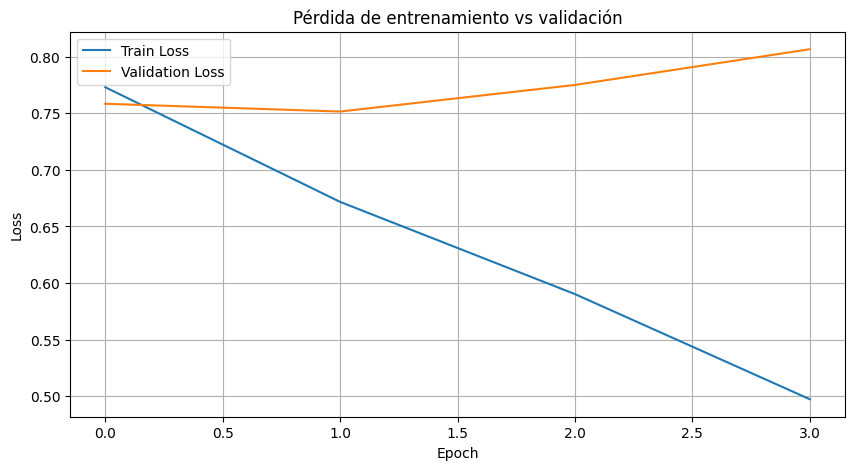

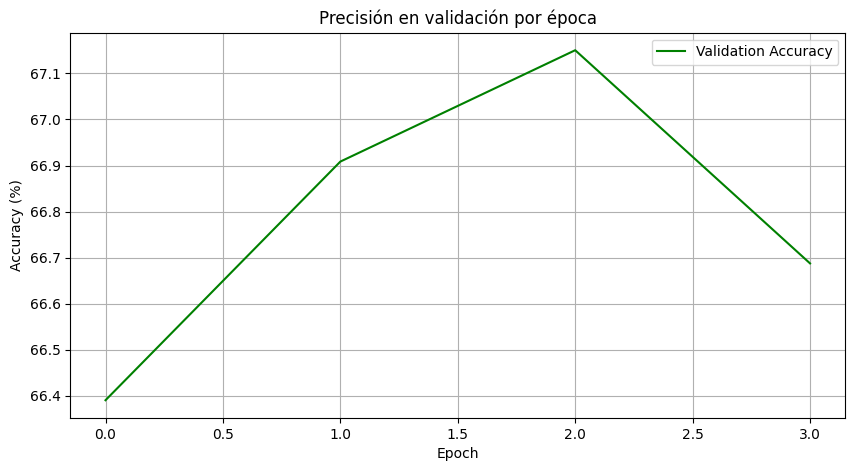

In [ ]:
import os
import matplotlib.pyplot as plt

# ---------------- Listas para guardar métricas  ----------------------------
train_losses = []
val_losses = []
val_accuracies = []
#----------------------------------------------------------------------------

# Inicializar early stopping
best_val_loss = float('inf')
patience = 2  # Número de épocas sin mejora para detener
patience_counter = 0

# Número de épocas de entrenamiento
num_epochs = 10  # Puedes aumentarlo gracias a early stopping

# 📂 Carpeta donde guardarás el mejor modelo
best_model_dir = "/content/drive/MyDrive/IA/best_model_restMex2204A2"
os.makedirs(best_model_dir, exist_ok=True)


# ========================== ENTRENAMIENTO ==========================
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # ---------------- Evaluación ----------------
    model.eval()
    total_val_loss = 0
    correct_predictions = 0

    for batch in val_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        total_val_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += (preds == labels).sum().item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    accuracy = correct_predictions / len(val_dataloader.dataset)

    # ---------------- Guardar métricas ----------------
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)

    # ---------------- Resultados por época ----------------
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"  🔹 Train loss: {avg_train_loss:.4f}")
    print(f"  🔹 Validation loss: {avg_val_loss:.4f}")
    print(f"  ✅ Validation accuracy: {accuracy * 100:.2f}%")

    # ---------------- Early Stopping y Guardado del Mejor Modelo ----------------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0

        # ✅ Guardar modelo y tokenizer
        model.save_pretrained(best_model_dir)
        tokenizer.save_pretrained(best_model_dir)

        print(f"💾 Mejor modelo guardado en {best_model_dir}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("🛑 Early stopping activado.")
            break

# ---------------- GRAFICAR RESULTADOS ----------------
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida de entrenamiento vs validación")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot([acc * 100 for acc in val_accuracies], label='Validation Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Precisión en validación por época")
plt.legend()
plt.grid(True)
plt.show()


**Evaluacion del conjunto test_dataloader**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Cargar mejor modelo
from transformers import BertForSequenceClassification

best_model = BertForSequenceClassification.from_pretrained(best_model_dir).to(device)
best_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = best_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Métricas
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
report = classification_report(all_labels, all_preds, digits=4)

print("\n📊 Resultados en el conjunto de TEST:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n📄 Reporte de clasificación por clase:\n")
print(report)



📊 Resultados en el conjunto de TEST:
✅ Accuracy:  0.6678
✅ Precision: 0.6607
✅ Recall:    0.6678
✅ F1 Score:  0.6601

📄 Reporte de clasificación por clase:

              precision    recall  f1-score   support

           0     0.6059    0.7892    0.6855      1309
           1     0.4627    0.2781    0.3474      1381
           2     0.6333    0.5424    0.5843      3837
           3     0.6592    0.6151    0.6364      8836
           4     0.7136    0.8193    0.7628      8751

    accuracy                         0.6678     24114
   macro avg     0.6149    0.6088    0.6033     24114
weighted avg     0.6607    0.6678    0.6601     24114



**Cargar Modelo BERT previamente entrenado para clasificación de texto**

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# 1. 📥 Leer el archivo
file_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test.xlsx"
df_test = pd.read_excel(file_path)

In [ ]:
# 2. 🧾 Concatenar 'Title' y 'Review'
df_test["text"] = df_test["Title"].astype(str) + ". " + df_test["Review"].astype(str)

# 3. 🔤 Cargar el tokenizer correcto
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 4. 🧠 Cargar el modelo entrenado
model_path = "/content/drive/MyDrive/IA/best_model_restMex2204A"
model = BertForSequenceClassification.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
model.eval()

# 5. 🧹 Tokenizar los textos
encodings = tokenizer(df_test['text'].tolist(),
                      truncation=True,
                      padding=True,
                      max_length=128,
                      return_tensors="pt")

In [ ]:
# 6. 📦 Crear DataLoader
dataset = TensorDataset(encodings["input_ids"], encodings["attention_mask"])
dataloader = DataLoader(dataset, batch_size=32)

# 7. 🔍 Predicción
all_preds = []

with torch.no_grad():
    for batch in tqdm(dataloader, desc="Clasificando"):
        input_ids, attention_mask = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())

# 8. 💾 Guardar resultados
df_result = pd.DataFrame({
    "ID": df_test["ID"],
    "Predicted_Polarity": all_preds
})

output_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test_results.csv"
df_result.to_csv(output_path, index=False)

print(f"✅ Resultados guardados en: {output_path}")


Clasificando: 100%|██████████| 2787/2787 [09:29<00:00,  4.89it/s]

✅ Resultados guardados en: /content/drive/MyDrive/IA/Rest-Mex_2025_test_results.csv


In [ ]:
# 8. 💾 Mapear etiquetas de modelo (0–4) a originales (1–5)
label_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}
original_labels = [label_map[p] for p in all_preds]

df_result = pd.DataFrame({
    "ID": df_test["ID"],
    "Predicted_Polarity": original_labels
})

output_path = "/content/drive/MyDrive/IA/Rest-Mex_2025_test_results_OK.csv"
df_result.to_csv(output_path, index=False)

print(f"✅ Resultados guardados con etiquetas originales 1–5 en: {output_path}")


✅ Resultados guardados con etiquetas originales 1–5 en: /content/drive/MyDrive/IA/Rest-Mex_2025_test_results_OK.csv


In [ ]:
print(df_test.head())

   ID                                       Title  \
0   0      Una de las mejores comidas en Sayulita   
1   1                           Me gustó mucho...   
2   2  Excelentes  restaurantes en hotel Guaycura   
3   3                    Gran desayuno y almuerzo   
4   4         Mejor atención de la zona hotelera!   

                                              Review  
0  Comida exelente, el lugar muy cómodo y persona...  
1  En mi camino hacia Mahahual paré a comer en es...  
2  Excelente Servicio, la comida es deliciosa tan...  
3  Mi esposa y yo fuimos allí dos veces. Una vez ...  
4  Increíble restaurant! La comida riquísima, la ...  


In [ ]:
print(df_test.head())

   ID                                       Title  \
0   0      Una de las mejores comidas en Sayulita   
1   1                           Me gustó mucho...   
2   2  Excelentes  restaurantes en hotel Guaycura   
3   3                    Gran desayuno y almuerzo   
4   4         Mejor atención de la zona hotelera!   

                                              Review  \
0  Comida exelente, el lugar muy cómodo y persona...   
1  En mi camino hacia Mahahual paré a comer en es...   
2  Excelente Servicio, la comida es deliciosa tan...   
3  Mi esposa y yo fuimos allí dos veces. Una vez ...   
4  Increíble restaurant! La comida riquísima, la ...   

                                                text  
0  Una de las mejores comidas en Sayulita. Comida...  
1  Me gustó mucho.... En mi camino hacia Mahahual...  
2  Excelentes  restaurantes en hotel Guaycura. Ex...  
3  Gran desayuno y almuerzo. Mi esposa y yo fuimo...  
4  Mejor atención de la zona hotelera!. Increíble...  


In [ ]:
print(df_test.head())

   ID                                       Title  \
0   0      Una de las mejores comidas en Sayulita   
1   1                           Me gustó mucho...   
2   2  Excelentes  restaurantes en hotel Guaycura   
3   3                    Gran desayuno y almuerzo   
4   4         Mejor atención de la zona hotelera!   

                                              Review  \
0  Comida exelente, el lugar muy cómodo y persona...   
1  En mi camino hacia Mahahual paré a comer en es...   
2  Excelente Servicio, la comida es deliciosa tan...   
3  Mi esposa y yo fuimos allí dos veces. Una vez ...   
4  Increíble restaurant! La comida riquísima, la ...   

                                                text  
0  Una de las mejores comidas en Sayulita. Comida...  
1  Me gustó mucho.... En mi camino hacia Mahahual...  
2  Excelentes  restaurantes en hotel Guaycura. Ex...  
3  Gran desayuno y almuerzo. Mi esposa y yo fuimo...  
4  Mejor atención de la zona hotelera!. Increíble...  
